To do:

- upload tags
- upload IBI
- merge data

Filenames in every zip:
- ACC.csv
- EDA.csv
- BVP.csv
- TEMP.csv
- IBI.csv
- HR.csv
- info.txt
- tags.csv

In [1]:
import zipfile
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
'''folders'''
s_fldr = 'C:/Users/elmasyr/Seafile/mypython/'#source folder
a_fldr = 'C:/Users/elmasyr/Seafile/mypython'#analysis folder
t_fldr = 'C:/Users/elmasyr/Seafile/mypython' #target folder for the data

In [3]:
'''Identification of the E4 zip file'''
# sid = 'test' #subject id
thiszip = '1519129262' #E4 id
zippath = s_fldr + '/' + str(thiszip)
print (zippath)

C:/Users/elmasyr/Seafile/mypython//1519129262


## Read from zip file

In [4]:
def readfromzip(zipid, filestr):
    filename = str(zipid)+'_A01601.zip' #identification of the device is _A01601
    print (filename)
    myfile = zipfile.ZipFile(filename, "r")
    for name in myfile.namelist():
        if filestr in name:
            print (filestr)
            return pd.read_csv(myfile.open(filestr), header=None) 

In [5]:
def fetchfile(thismeas):    
    thisdata = thismeas.lower()
    thisfile = thismeas+'.csv'    
    return readfromzip(zippath, thisfile)

In [6]:
acc = fetchfile('ACC')
eda = fetchfile('EDA')
bvp = fetchfile('BVP')
temp = fetchfile('TEMP')
ibi = fetchfile('IBI')
hr = fetchfile('HR')

C:/Users/elmasyr/Seafile/mypython//1519129262_A01601.zip
ACC.csv
C:/Users/elmasyr/Seafile/mypython//1519129262_A01601.zip
EDA.csv
C:/Users/elmasyr/Seafile/mypython//1519129262_A01601.zip
BVP.csv
C:/Users/elmasyr/Seafile/mypython//1519129262_A01601.zip
TEMP.csv
C:/Users/elmasyr/Seafile/mypython//1519129262_A01601.zip
IBI.csv
C:/Users/elmasyr/Seafile/mypython//1519129262_A01601.zip
HR.csv


## Add timestamps per frequency

In [7]:
def timestamps(dat):
    start = dat.iloc[0,0]
    pdstart = pd.to_datetime(start, unit='s')
    data = dat.iloc[2:,0]
    fs = dat.iloc[1,0] #Hz
    period = str(int(round(1000000./fs)))+'U'    #microseconds
    return pd.date_range(pdstart, periods=len(data), freq=period)

## Merge file and timestamps 

In [8]:
def datatime(data, columns):
    timest = timestamps(data)
    dfdata = pd.DataFrame(data.loc[2:,0])    
    dfdata = dfdata.reset_index(drop=True)
    dfdata.columns = columns
    dfdata.insert(0, 'time', timest, allow_duplicates=False)
    return dfdata

In [9]:
def accdatatime(data, columns):
    timest = timestamps(data)
    dfdata = pd.DataFrame(data.iloc[2:,:])    
    dfdata = dfdata.reset_index(drop=True)
    print (dfdata.shape)
    dfdata.columns = columns
    dfdata.insert(0, 'time', timest, allow_duplicates=False)
    return dfdata

In [10]:
dfacc = accdatatime(acc, [['accx', 'accy', 'accz']])
dfeda = datatime(eda, ['eda'])
dfbvp = datatime(bvp, ['bvp'])
dftemp = datatime(temp, ['temp'])
dfhr = datatime(hr, ['hr'])

(4692, 3)


In [11]:
print (dfacc.head(), ('\n' * 2), dfeda.head(), ('\n' * 2), \
dfbvp.head(), ('\n' * 2), dftemp.head(), \
('\n' * 2), dfhr.head())

                        time  accx  accy  accz
0 2018-02-20 12:21:02.000000 -36.0   5.0  51.0
1 2018-02-20 12:21:02.031250 -36.0   6.0  52.0
2 2018-02-20 12:21:02.062500 -36.0   5.0  52.0
3 2018-02-20 12:21:02.093750 -37.0   6.0  51.0
4 2018-02-20 12:21:02.125000 -36.0   6.0  52.0 

                      time       eda
0 2018-02-20 12:21:02.000  0.000000
1 2018-02-20 12:21:02.250  0.832765
2 2018-02-20 12:21:02.500  1.089267
3 2018-02-20 12:21:02.750  0.933033
4 2018-02-20 12:21:03.000  0.925346 

                         time  bvp
0 2018-02-20 12:21:02.000000 -0.0
1 2018-02-20 12:21:02.015625 -0.0
2 2018-02-20 12:21:02.031250 -0.0
3 2018-02-20 12:21:02.046875 -0.0
4 2018-02-20 12:21:02.062500 -0.0 

                      time   temp
0 2018-02-20 12:21:02.000  30.21
1 2018-02-20 12:21:02.250  30.21
2 2018-02-20 12:21:02.500  30.21
3 2018-02-20 12:21:02.750  30.21
4 2018-02-20 12:21:03.000  30.21 

                  time     hr
0 2018-02-20 12:21:12  52.00
1 2018-02-20 12:21:13  52.00
2

In [12]:
print (dfacc.min(), dfacc.max(), ('\n' * 2), \
dfeda.min(), dfeda.max(), ('\n' * 2), \
dfbvp.min(), dfbvp.max(), ('\n' * 2), \
dftemp.min(), dftemp.max(), ('\n' * 2), \
dfhr.min(), dfhr.max())

time    2018-02-20 12:21:02
accx                    -44
accy                     -7
accz                     42
dtype: object time    2018-02-20 12:23:28.593750
accx                           -18
accy                            26
accz                            87
dtype: object 

 time    2018-02-20 12:21:02
eda                       0
dtype: object time    2018-02-20 12:23:28.750000
eda                        3.07811
dtype: object 

 time    2018-02-20 12:21:02
bvp                 -549.96
dtype: object time    2018-02-20 12:23:28.593750
bvp                         296.28
dtype: object 

 time    2018-02-20 12:21:02
temp                  30.21
dtype: object time    2018-02-20 12:23:27.750000
temp                         30.83
dtype: object 

 time    2018-02-20 12:21:12
hr                       52
dtype: object time    2018-02-20 12:23:28
hr                    74.72
dtype: object


In [13]:
print (dfacc.shape, ('\n'), dfeda.shape, ('\n'), \
dfbvp.shape, ('\n'), dftemp.shape, ('\n'), dfhr.shape)

(4692, 4) 
 (588, 2) 
 (9383, 2) 
 (584, 2) 
 (137, 2)


In [14]:
'''Save to CSV'''
def savecsv(mydf, dataname):
    mycsv = t_fldr + '/' + dataname +'.csv'
    print (mycsv)
    mydf.to_csv(mycsv, sep=',', encoding='utf-8', index=False)

In [15]:
savecsv(dfacc, 'dfacc')
savecsv(dfeda, 'dfeda')
savecsv(dfbvp, 'dfbvp')
savecsv(dftemp, 'dftemp')
savecsv(dfhr, 'dfhr')

C:/Users/elmasyr/Seafile/mypython/dfacc.csv
C:/Users/elmasyr/Seafile/mypython/dfeda.csv
C:/Users/elmasyr/Seafile/mypython/dfbvp.csv
C:/Users/elmasyr/Seafile/mypython/dftemp.csv
C:/Users/elmasyr/Seafile/mypython/dfhr.csv


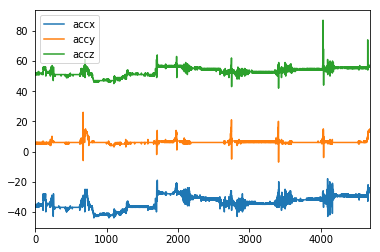

In [16]:
dfacc.plot();

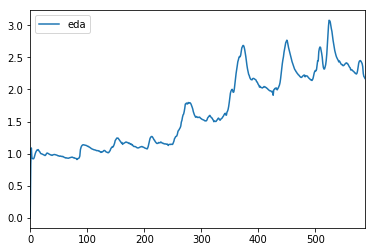

In [17]:
dfeda.plot();

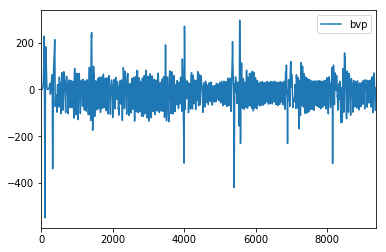

In [18]:
dfbvp.plot()

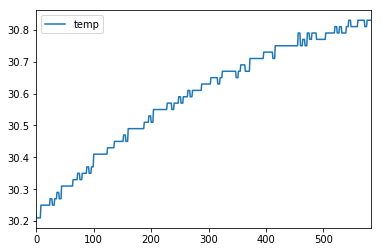

In [19]:
dftemp.plot()